In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t1 = torch.tensor([1,2,3],dtype = torch.float64)
t2 = torch.tensor([4,5,6],dtype = torch.float64)

print("t1 : ",t1)
print("t2 : ",t2)
print("t1 + t2" , t1 + t2)

t1 :  tensor([1., 2., 3.], dtype=torch.float64)
t2 :  tensor([4., 5., 6.], dtype=torch.float64)
t1 + t2 tensor([5., 7., 9.], dtype=torch.float64)


In [4]:
one_tsr = torch.ones((3,4),dtype = torch.float64)
print("ones: \n",one_tsr)

zero_tsr = torch.zeros((3,4),dtype = torch.float64)
print("zeros: \n",zero_tsr)

random_tsr = torch.randn((3,4),dtype = torch.float64)
print("random tensor: \n",random_tsr)

ones: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)
zeros: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)
random tensor: 
 tensor([[ 0.9120, -0.1079,  1.3206, -0.8667],
        [ 0.9217, -0.4554,  0.8836,  1.3580],
        [ 0.9007, -1.4048, -1.4901,  0.7035]], dtype=torch.float64)


In [5]:
tsr1 = torch.tensor([1.3])
print(tsr1)
print(tsr1.item())

tensor([1.3000])
1.2999999523162842


In [6]:
AA = np.array([
    [1,2],
    [4,5]
])

tsr_np = torch.tensor(AA,dtype = torch.complex64)
print(tsr_np)

AA_from_torch = tsr_np.numpy()
print(AA_from_torch)

tensor([[1.+0.j, 2.+0.j],
        [4.+0.j, 5.+0.j]])
[[1.+0.j 2.+0.j]
 [4.+0.j 5.+0.j]]


In [7]:
A = torch.randn((3,4),dtype = torch.float64)
x = torch.randn(4,dtype = torch.float64)

print("A: \n",A)
print("x: \n",x)
print("Ax : \n",torch.matmul(A,x))
print("sum(Ax): \n", torch.matmul(A,x).sum().item())

A: 
 tensor([[-0.0139,  0.0429, -1.1867, -1.1456],
        [ 0.8541, -0.0990, -0.4190, -0.3383],
        [ 0.8954,  0.2461,  1.1103,  0.5125]], dtype=torch.float64)
x: 
 tensor([1.0509, 0.0557, 0.1081, 1.4068], dtype=torch.float64)
Ax : 
 tensor([-1.7521,  0.3709,  1.7957], dtype=torch.float64)
sum(Ax): 
 0.4144267923927001


In [8]:
b = torch.rand(1000,dtype = torch.float64) #uniformly distributed data
print("mean value of  tensor: \n",b.mean())

b = torch.randn(1000,dtype = torch.float64) #normally distributed data
print("mean value of tensor: \n",b.mean())

mean value of  tensor: 
 tensor(0.4940, dtype=torch.float64)
mean value of tensor: 
 tensor(0.0232, dtype=torch.float64)


In [9]:
c = torch.rand((3,4))
print("c: \n",c)
print("c.t(): \n",c.t())
print("c^2 : \n",c.pow(2))

b = torch.rand((3,3))
print("trace of the tensor: \n", b.trace())

c: 
 tensor([[0.3703, 0.1269, 0.9972, 0.4195],
        [0.5951, 0.0221, 0.1322, 0.2591],
        [0.2554, 0.7447, 0.9095, 0.6000]])
c.t(): 
 tensor([[0.3703, 0.5951, 0.2554],
        [0.1269, 0.0221, 0.7447],
        [0.9972, 0.1322, 0.9095],
        [0.4195, 0.2591, 0.6000]])
c^2 : 
 tensor([[1.3709e-01, 1.6100e-02, 9.9448e-01, 1.7598e-01],
        [3.5409e-01, 4.8841e-04, 1.7470e-02, 6.7156e-02],
        [6.5221e-02, 5.5451e-01, 8.2711e-01, 3.5995e-01]])
trace of the tensor: 
 tensor(1.9179)


In [11]:
#scatter function to create tensor filled with ones

n = 5
basis = [torch.zeros(n,dtype = torch.float).scatter_(0,torch.tensor([i]),value = 1) for i in range(n)]
for i in range(n):
    print(f"basis element {i + 1} : \n",basis[i])

basis element 1 : 
 tensor([1., 0., 0., 0., 0.])
basis element 2 : 
 tensor([0., 1., 0., 0., 0.])
basis element 3 : 
 tensor([0., 0., 1., 0., 0.])
basis element 4 : 
 tensor([0., 0., 0., 1., 0.])
basis element 5 : 
 tensor([0., 0., 0., 0., 1.])


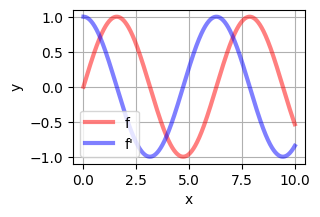

In [12]:
x = torch.arange(0,10,0.01,requires_grad = True)
y = torch.sin(x)

y.sum().backward()

fig = plt.figure(figsize = (3,2))
ax = fig.add_subplot()
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")

with torch.no_grad():
    ax.plot(x,y,color = "red",alpha = 0.5,lw = 3,label = "f")
    ax.plot(x,x.grad,color = "blue",alpha = 0.5,lw = 3,label = "f'")
plt.legend()
plt.show()

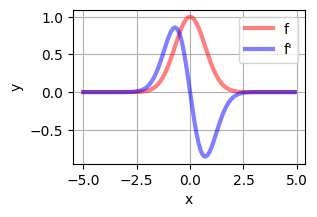

In [13]:
x = torch.arange(-5,5,0.1,requires_grad = True)
y = - x ** 2

y_ = y.detach()
y_.requires_grad_(True)

z = torch.exp(y_)

z.sum().backward()
y.sum().backward()


fig = plt.figure(figsize = (3,2))
ax = fig.add_subplot()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True)

# another way to reobtain numerical values from tensor 
# which requires grad is to open inference mode
with torch.inference_mode(): 
    ax.plot(x,z,color = "red",alpha = 0.5,lw = 3,label = "f")
    ax.plot(x,x.grad * y_.grad,color = "blue",alpha = 0.5,lw = 3,label = "f'")
plt.legend()
plt.show()

#We can use x one more time by zeroing gradient

x.grad.zero_()
y2 = torch.sin(x)
y2.sum().backward()